# **Case Study on Testing of Hypothesis <br>**

A company started to invest in digital marketing as a new way of their product promotions.For that they collected data and decided to carry out a study on it.<br>
** Input data=Sales_add.csv'

In [ ]:
#Importing relevant libraries

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import chi2

In [ ]:
#Reading the dataset

In [2]:
data= pd.read_csv('G:\my trials\Casestudy\Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [ ]:
# Performing general analysis 

In [3]:
data.shape

(22, 5)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [4]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


<AxesSubplot:>

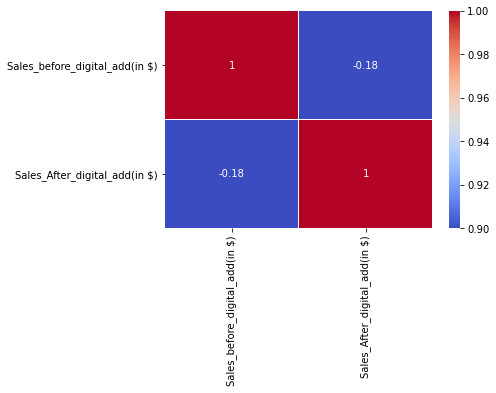

In [6]:
corrmatrix=data.corr()
plt.subplots()
sns.heatmap(corrmatrix,vmin=0.9,vmax=1,annot=True,linewidth=0.2,cmap="coolwarm")

**Insights**<br>
-  The datset consists of 22 raws and 5 columns.<br>
-  The first 3 columns are of object type and remaining are interger type.<br>
-  The dataset contains no null values.<br>
-  Sales_before_digital_add and Sales_After_digital_add are negatively correlated.<br>

## Q. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

As the sample size is small(n < 30), we use t-test to test our hypothesis<br>
<br>
** Hypothesis **<br>
Null Hypothesis (**H0**): The average sales before and after investing andin digital marketing is same.<br>
Alternate Hypothesis (**H1**): The average sales after investing in digital marketing is greater than the average sales before investing.<br>
Significance level : 0.05

In [6]:
stats.ttest_ind(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

Ttest_indResult(statistic=-12.995084451110877, pvalue=2.614368006904645e-16)

**Insights**<br>
-  As evident, the p-value is much less than 0.05, hence we can reject the null hypothesis.<br>
-  The average sales after investing in digital marketing is high.<br>


## Q.The company needs to check whether there is any dependency between the features “Region” and “Manager”.

**Define Hypothesis**<br>
Null Hypothesis (**H0**): Two variables are independent.<br>
Alternate Hypothesis (**H1**): Two variables are not independent.

In [13]:
pd.crosstab(data.Region, data.Manager)

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [14]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(data.Region, data.Manager))

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

**Insights**<br>
-  The second value of the above output(0.5493991051158094) represents the p-value of the test. <br>
-  As evident, the p-value is greater than 0.05, hence we can not reject the null hypothesis.<br>
-  Region  is associated with the Manager.